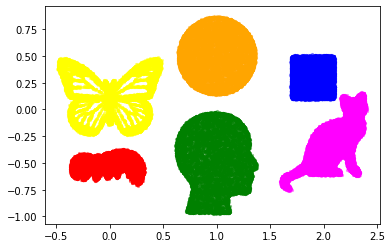

In [11]:
from IPython.display import clear_output
import pdb, time, math, numpy as np, gc, importlib, torch, os, cv2 as cv, ODEModel
import matplotlib.pyplot as plt
from torch import Tensor, nn
from torch.nn import functional as F 
from torch.autograd import Variable
from torch.distributions import MultivariateNormal
from torchdiffeq import odeint_adjoint as odeint 
from geomloss import SamplesLoss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import Utils, LearnTraj, LearnVelTraj
importlib.reload(Utils)
from Utils import InputMapping, BoundingBox, ImageDataset, SaveTrajectory, ezshow, SaveTrajectory as st, MiscTransforms
importlib.reload(ODEModel)
from ODEModel import velocMLP, coordMLP, FfjordModel
importlib.reload(LearnVelTraj);
from LearnTraj import learn_trajectory
from LearnVelTraj import learn_vel_trajectory
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

im1 = ImageDataset('frames/butterfly.jpg'); 
im1b = ImageDataset('frames/butterflyfilled.jpg'); 
im2 = ImageDataset('frames/caterpillar.png', noise_std = .005); 
im3 = ImageDataset('frames/circle.jpeg'); 
im4 = ImageDataset('frames/baldhead.jpeg'); 
im5 = ImageDataset('frames/square.png'); 
im6 = ImageDataset('frames/cat1.png'); 

n_inner = 7000;
n_sil = 10000 - n_inner;
d2 = im2.sample(n_inner, n_sil, scale = [-1, -1], center = [0.05, -.5]); 
d1a = im1.sample(n_inner, n_sil, center = [0, 0]); 
d1b = im1b.sample(n_inner, n_sil, center = [0, 0]); 
d3 = im3.sample(n_inner, n_sil, center = [1, .5]); 
d4 = im4.sample(n_inner, n_sil, center = [1, -.5]); 
d5 = im5.sample(n_inner, n_sil, center = [1.9, .3]); 
d6 = im6.sample(n_inner, n_sil, center = [2, -.3]); 

dat1 = torch.cat((d1a[0], d1b[1]),0)
dat2 = torch.cat(d2,0)
dat3 = torch.cat(d3,0)
dat4 = torch.cat(d4,0)
dat5 = torch.cat(d5,0)
dat6 = torch.cat(d6,0)

ezshow(dat1, col='yellow')
ezshow(dat2, col='red')
ezshow(dat3, col='orange')
ezshow(dat4, col='green')
ezshow(dat5, col='blue')
ezshow(dat6, col='magenta')

In [12]:
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6)).to(device));
model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = .5, in_features=3, out_features=2).to(device); 
outfolder = "results/experiment1/"
model, losses, separate_losses, lrs, n_subs = learn_vel_trajectory(keyframes, n_iters = 300, n_subsample=300, model=model, outname=outfolder)

  3%|▎         | 1/30 [00:00<00:06,  4.16it/s]

Allocated: 0.03 GB  Reserved: 0.73 GB
(loss: 2.0000) (lr: 0.0001) (n_subsample: 300) 
(time elapsed: 0.2391) (total time: 0.2409) (fit time: 0.0921) (reg loss time: 0.0361) (savetime: 0.0000)


 37%|███▋      | 11/30 [00:08<00:32,  1.74s/it]

Allocated: 0.03 GB  Reserved: 0.75 GB
(loss: 0.4297) (lr: 0.0001) (n_subsample: 300) 
(time elapsed: 3.6431) (total time: 8.3485) (fit time: 0.0950) (reg loss time: 0.0381) (savetime: 4.4617)


 70%|███████   | 21/30 [00:16<00:15,  1.75s/it]

Allocated: 0.03 GB  Reserved: 0.75 GB
(loss: 0.0464) (lr: 0.0001) (n_subsample: 300) 
(time elapsed: 3.7757) (total time: 16.5676) (fit time: 0.1133) (reg loss time: 0.0462) (savetime: 4.4394)


100%|██████████| 30/30 [00:20<00:00,  1.47it/s]


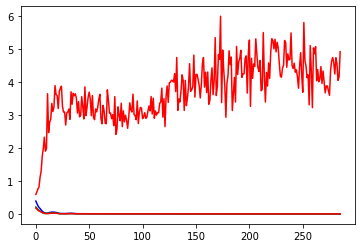

In [6]:
start=15;end=20000;
plt.plot(losses[start:end],'b'); 
plt.plot(separate_losses[0,start:end],'g'); 
plt.plot(separate_losses[1,start:end],'r'); 
# plt.plot(separate_losses[2,start:end]); 
plt.plot(separate_losses[3,start:end],'r'); 
# plt.plot(separate_losses[4,start:end]*10,'b'); 
# plt.plot(separate_losses[5,start:end]); 
# plt.plot(separate_losses[6,start:end]);
plt.savefig(os.path.join('./', f"viz_loss.jpg"),dpi=400); 